In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Описание данных

Визуальная схема в google sheets: https://docs.google.com/spreadsheets/d/1jgg2W6kcYNEoMsbhBy6MqfPvUFDs8u2-VOXXMYx-J6c/edit?usp=sharing

**courses.csv** — файл содержит список предметов по семестрам.  

```code_module``` — предмет (идентификационный код).

```code_presentation``` — семестр (идентификационный код).

```module_presentation_length``` — продолжительность семестра в днях.

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).  

```code_module``` — идентификационный код предмета.  

```code_presentation``` — семестр (Идентификационный код).  

```id_assessment``` — тест (Идентификационный номер ассессмента).  

```assessment_type``` — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).  

```date``` — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).  

```weight``` — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.  

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.  

```id_assessment``` — тест (идентификационный номер).  

```id_student``` — идентификационный номер студента.  

```date_submitted``` — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.  

```is_banked``` — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).  

```score``` — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.  

```code_module``` — предмет (идентификационный код).  

```code_presentation``` — семестр (идентификационный код)  

```id_student``` — идентификационный номер студента.  

```date_registration``` — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).  

```date_unregistration``` — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникального идентификатора курса.

Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:  

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).  

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)  

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов)   

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)  

5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов)   

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. (23 балла)  

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

### Посмотрим на табличку courses

In [3]:
courses.shape

(22, 3)

In [4]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [5]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [6]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [7]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [8]:
courses.duplicated().sum()

0

### Выводы

В табличке courses нет пропущенных значений и дубликатов

### Assessments.csv

In [9]:
assessments.shape

(206, 6)

In [10]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [11]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [12]:
assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [13]:
assessments.assessment_type.unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [14]:
assessments.duplicated().sum()

0

In [15]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [16]:
assessments.query('date == "NaN"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [17]:
assessments_date_nan = assessments.query('date == "NaN"')

In [18]:
assessments_date_nan.id_assessment.nunique()

11

В табличке assessments 11 уникальных пропущенных значений и нет дубликатов. Посмотрим, важны ли эти значения в других табличках. 

In [19]:
studentAssessment[studentAssessment['id_assessment'].isin(assessments_date_nan.id_assessment)].head()

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0


Проверим, какие именно это значения

In [20]:
studentAssessment[studentAssessment['id_assessment'] \
                .isin(assessments_date_nan.id_assessment.unique())]['id_assessment'] \
                .value_counts()

24299    1168
25368     950
24290     747
Name: id_assessment, dtype: int64

In [21]:
list(studentAssessment[studentAssessment['id_assessment'] \
                        .isin(assessments_date_nan.id_assessment.unique())]['id_assessment']\
                         .value_counts().index)

[24299, 25368, 24290]

Только у этих значений id_assessment есть соответствующие строки в табличке studentAssessment. Остальные мы можем удалить после проверки (в данном случае, так как список небольшой, я проверила их вручную в том числе и убедилась, что всё правильно)

In [22]:
invalid_ids = set(assessments_date_nan.id_assessment.unique()) - set(studentAssessment[studentAssessment['id_assessment'].isin(assessments_date_nan.id_assessment.unique())]['id_assessment'].value_counts().index)

In [23]:
invalid_ids

{1757, 1763, 14990, 15002, 15014, 15025, 40087, 40088}

In [24]:
studentAssessment[studentAssessment['id_assessment'] == 24299].shape

(1168, 5)

In [25]:
studentAssessment[studentAssessment['id_assessment'] == 15014].shape

(0, 5)

Удалим из assessment только те id_assessment, для которых не найдено соответствий (invalid_ids)

In [26]:
assessments = assessments[~assessments['id_assessment'].isin(invalid_ids)]

In [27]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


### Выводы

Я удалила из таблички assessments пустые значения

### studentAssessment.csv

In [28]:
studentAssessment.shape

(173912, 5)

In [29]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [30]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [31]:
studentAssessment.duplicated().isna().sum()

0

In [32]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

### Выводы

В табличке studentAssessment нет дубликатов и есть 173 строки, в которых score равен NaN. score = 0 считается неудачной оценкой, а score == NaN – пропуск значения. Решила не удалять эти значения, так как в дальнейших заданиях всегда буду использовать score >= 40

### studentRegistration.csv

In [33]:
studentRegistration.shape

(32593, 5)

In [34]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [35]:
studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [36]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [37]:
studentRegistration.query('date_registration == "NaN"').shape

(45, 5)

45 значений, в которых date_registration == NaN. "0" в данном поле означало бы, что студент зарегистрировался на курс в день его начала, тогда NaN означает, что данные пропущены. 

In [38]:
studentRegistration.query('date_unregistration == 0').shape

(419, 5)

In [39]:
studentRegistration.query('date_unregistration == "NaN"').shape

(22521, 5)

### Задание 0
Что можно считать курсом?
Курс = связка ```code_module``` и ```code_presentation```. То есть это **предмет** (```code_module```), который студент  берёт в **семестре** (```code_presentation```). 

### Задание 1
Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов). 

In [40]:
assessments_total = pd.merge(studentAssessment, assessments, on='id_assessment', how='left')

In [41]:
assessments_total['success_exam'] = assessments_total.score >= 40

In [42]:
assessments_total.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True


In [43]:
assessments_total.query('weight == 100 & score >= 40 & assessment_type == "Exam"') \
                .groupby('id_student', as_index=False) \
                .agg({'success_exam' : 'count'}) \
                .query('success_exam == 1').shape

(3802, 2)

Количество студентов, успешно сдавших только один курс – **3802**   

### Задание 2

Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [44]:
assessments_total.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True


In [45]:
total_attempts = assessments_total.query('assessment_type == "Exam"') \
    .groupby(['id_assessment', 'assessment_type', 'code_module', 'code_presentation']).agg(
        total_attempts=('score', 'count'),  
        successful_attempts=('success_exam', 'sum')  
    ).reset_index()

In [46]:
total_attempts

,id_assessment,assessment_type,code_module,code_presentation,total_attempts,successful_attempts
0,24290,Exam,CCC,2014B,747,664
1,24299,Exam,CCC,2014J,1168,1019
2,25340,Exam,DDD,2013B,602,504
3,25354,Exam,DDD,2013J,968,878
4,25361,Exam,DDD,2014B,524,485
5,25368,Exam,DDD,2014J,950,842


In [47]:
total_attempts['total'] = total_attempts.successful_attempts / total_attempts.total_attempts

In [48]:
total_attempts.sort_values(by='total')

,id_assessment,assessment_type,code_module,code_presentation,total_attempts,successful_attempts,total
2,25340,Exam,DDD,2013B,602,504,0.837209
1,24299,Exam,CCC,2014J,1168,1019,0.872432
5,25368,Exam,DDD,2014J,950,842,0.886316
0,24290,Exam,CCC,2014B,747,664,0.888889
3,25354,Exam,DDD,2013J,968,878,0.907025
4,25361,Exam,DDD,2014B,524,485,0.925573


Самый низкий – **DDD 2013B**,  самый высокий – **DDD 2014B**

### Задание 3

По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов) 

In [49]:
assessments_total.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True


In [50]:
assessments_total.query('weight == 100 & score >= 40 & assessment_type == "Exam"') \
                .groupby('code_module', as_index=False) \
                .agg({'date_submitted':'mean'}) \
                .round(2)

,code_module,date_submitted
0,CCC,239.35
1,DDD,237.98


Средний срок сдачи экзамена по предмету ССС: **239,35**. По предмету DDD: **237,98**

Если же имеем в виду курсы (code_module + code_presentation), получим следующие средние значения:

In [51]:
assessments_total.query('weight == 100 & score >= 40 & assessment_type == "Exam"') \
                .groupby(['code_module', 'code_presentation'], as_index=False) \
                .agg({'date_submitted':'mean'}) \
                .round(2)

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.58
1,CCC,2014J,244.40
2,DDD,2013B,230.16
3,DDD,2013J,239.51
4,DDD,2014B,234.94
5,DDD,2014J,242.80


### Задание 4

Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

1. Количество регистраций

In [52]:
studentRegs = studentRegistration.query('date_registration != "NaN"') \
                    .groupby('code_module', as_index=False) \
                    .agg({'id_student' : 'nunique'}).rename(columns={'id_student':'regs'}) 

In [53]:
studentRegs.sort_values(by='regs', ascending=False).head(3)

,code_module,regs
1,BBB,7683
5,FFF,7387
3,DDD,5840


Предметы с самым большим количеством регистраций: BBB, FFF, DDD.  

2. Отток  
Отток = date_unregistration / date_registration

In [54]:
studentOutFlow = studentRegistration.query('date_unregistration != "NaN"') \
                    .groupby(['code_module'], as_index=False) \
                    .agg({'id_student' : 'nunique'}).rename(columns={'id_student':'unregs'})

In [55]:
studentOutFlow

,code_module,unregs
0,AAA,116
1,BBB,2314
2,CCC,1858
3,DDD,2065
4,EEE,693
5,FFF,2249
6,GGG,287


In [56]:
studentOutFlow = pd.merge(studentOutFlow, studentRegs, on='code_module', how='left')

In [57]:
studentOutFlow

,code_module,unregs,regs
0,AAA,116,712
1,BBB,2314,7683
2,CCC,1858,4244
3,DDD,2065,5840
4,EEE,693,2858
5,FFF,2249,7387
6,GGG,287,2525


In [58]:
studentOutFlow['outflow'] = studentOutFlow.unregs / studentOutFlow.regs * 100

In [59]:
studentOutFlow.sort_values(by='outflow', ascending=False)

,code_module,unregs,regs,outflow
2,CCC,1858,4244,43.779453
3,DDD,2065,5840,35.359589
5,FFF,2249,7387,30.445377
1,BBB,2314,7683,30.118443
4,EEE,693,2858,24.247726
0,AAA,116,712,16.292135
6,GGG,287,2525,11.366337


Предметы с самым большим оттоком: CCC, DDD, FFF.

### Задание 5

Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов) 

1. Самая низкая завершаемость курса по аналогии с заданием №2.

In [60]:
total_attempts.sort_values(by='total')

,id_assessment,assessment_type,code_module,code_presentation,total_attempts,successful_attempts,total
2,25340,Exam,DDD,2013B,602,504,0.837209
1,24299,Exam,CCC,2014J,1168,1019,0.872432
5,25368,Exam,DDD,2014J,950,842,0.886316
0,24290,Exam,CCC,2014B,747,664,0.888889
3,25354,Exam,DDD,2013J,968,878,0.907025
4,25361,Exam,DDD,2014B,524,485,0.925573


In [61]:
total_attempts['total_percent'] = round(total_attempts.total * 100)

In [62]:
total_attempts.sort_values(by='total')

,id_assessment,assessment_type,code_module,code_presentation,total_attempts,successful_attempts,total,total_percent
2,25340,Exam,DDD,2013B,602,504,0.837209,84.0
1,24299,Exam,CCC,2014J,1168,1019,0.872432,87.0
5,25368,Exam,DDD,2014J,950,842,0.886316,89.0
0,24290,Exam,CCC,2014B,747,664,0.888889,89.0
3,25354,Exam,DDD,2013J,968,878,0.907025,91.0
4,25361,Exam,DDD,2014B,524,485,0.925573,93.0


Самая низкая завершаемость в семестре 2013B – 84%

2. Семестр с самыми долгими средними сроками сдачи курсов

In [63]:
assessments_total

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True
...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,True
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,True
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,True
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,True


In [64]:
assessments_total \
            .query('assessment_type == "Exam" & score >= 40') \
            .groupby('code_presentation', as_index=False) \
            .agg({'date_submitted':'mean'}) \
            .sort_values(by='date_submitted', ascending=False)

,code_presentation,date_submitted
3,2014J,243.680279
1,2013J,239.509112
2,2014B,232.997389
0,2013B,230.164683


Семестр с самым долгим сроком сдачи – **2014J**

### Задание 6

Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики:   
R - среднее время сдачи одного экзамена,   
F - завершаемость курсов,   
M - среднее количество баллов, получаемое за экзамен.   

Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик ```recency```, ```frequency``` и ```monetary``` для интерпретации этих кластеров. (23 балла)

### Описание создание кластеров

1. Считаю метрики (recency, frecuency, monetary). То, что заявлено как R, F, M в задании, это и есть recency, frecuency и monetary  
2. Через метод describe() получаю границы для этих метрик, делаю функцию на основе полученных значений процентилей
3. Соединяю датасеты
4. В зависимости от значений метрик создаю колонки R, F, M, потом и RFM
5. Создаю кластеры на базе полученных оценок (R, F, M). В данном случае чем выше "оценки", тем "лучше" сегмент – например, у студентов отличников будет FRM = 555 (или другие высокие значения)
6. Добавляю колонку с сегментом и в зависимости от метрики RFM определяю сегмент
6. Визуализирую

### R: среднее время сдачи одного экзамена

In [65]:
assessments_total.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True


In [66]:
recency = assessments_total.query('weight == 100 & score >= 40 & assessment_type == "Exam"') \
                .groupby(['id_student','id_assessment'], as_index=False) \
                .agg({'date_submitted':'mean'})

In [67]:
recency.describe()

,id_student,id_assessment,date_submitted
count,4.392000e+03,4392.000000,4392.000000
mean,7.346271e+05,24950.217213,238.500683
std,5.779823e+05,516.213495,5.696651
min,2.369800e+04,24290.000000,229.000000
25%,5.085392e+05,24299.000000,234.000000
50%,5.919245e+05,25354.000000,241.000000
75%,6.479002e+05,25361.000000,243.000000
max,2.698251e+06,25368.000000,285.000000


In [68]:
def r_score(x):
    if x <= 234: 
        return 1
    elif x <= 241:
        return 2
    elif x <= 243:
        return 3
    elif x <= 285:
        return 4
    else:
        return 5

### F: завершаемость курсов

In [69]:
assessments_total.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success_exam
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True


In [70]:
frecuency = assessments_total.query('assessment_type == "Exam"') \
                    .groupby(['id_student', 'id_assessment'], as_index=False) \
                    .agg({'date_submitted' : 'mean'}).rename(columns={'date_submitted':'date_submitted_mean'})

In [71]:
frecuency.head()

,id_student,id_assessment,date_submitted_mean
0,23698,24299,243
1,24213,25361,236
2,27116,24299,243
3,28046,25354,237
4,28787,24299,243


In [72]:
frecuency.describe()

,id_student,id_assessment,date_submitted_mean
count,4.959000e+03,4959.000000,4959.000000
mean,7.224847e+05,24946.960678,238.483565
std,5.677954e+05,516.841544,5.717577
min,2.369800e+04,24290.000000,229.000000
25%,5.034125e+05,24299.000000,234.000000
50%,5.884820e+05,25340.000000,241.000000
75%,6.452175e+05,25361.000000,243.000000
max,2.698251e+06,25368.000000,285.000000


In [73]:
def f_score(x):
    if x <= 234: 
        return 1
    elif x <= 241:
        return 2
    elif x <= 243:
        return 3
    elif x <= 285:
        return 4
    else:
        return 5

### M: среднее количество баллов, получаемых за экзамен

In [74]:
monetary = assessments_total.query('assessment_type=="Exam"') \
                    .groupby(['id_student','code_module', 'code_presentation'], as_index=False) \
                    .agg({'score' : 'mean'}) \
                    .sort_values(by='score')

In [75]:
monetary.describe()

,id_student,score
count,4.959000e+03,4959.000000
mean,7.224847e+05,65.572898
std,5.677954e+05,20.579186
min,2.369800e+04,0.000000
25%,5.034125e+05,51.000000
50%,5.884820e+05,67.000000
75%,6.452175e+05,82.000000
max,2.698251e+06,100.000000


In [76]:
def m_score(x):
    if x <= 51:
        return 1
    elif x <= 67:
        return 2
    elif x <= 82:
        return 3
    elif x <= 100:
        return 4
    else:
        return 5

Объединяем метрики в один датафрейм: 

In [77]:
metrics_merged = pd.merge(recency, monetary, on='id_student', how='left')
metrics_merged = pd.merge(metrics_merged, frecuency, on=['id_student', 'id_assessment'], how='left')

In [78]:
metrics_merged.head()

,id_student,id_assessment,date_submitted,code_module,code_presentation,score,date_submitted_mean
0,23698,24299,243,CCC,2014J,80.0,243
1,24213,25361,236,DDD,2014B,58.0,236
2,27116,24299,243,CCC,2014J,96.0,243
3,28046,25354,237,DDD,2013J,40.0,237
4,28787,24299,243,CCC,2014J,44.0,243


In [79]:
metrics_merged['R'] = metrics_merged['date_submitted'].apply(r_score)
metrics_merged['F'] = metrics_merged['date_submitted_mean'].apply(f_score)
metrics_merged['M'] = metrics_merged['score'].apply(m_score)

In [80]:
metrics_merged.head()

,id_student,id_assessment,date_submitted,code_module,code_presentation,score,date_submitted_mean,R,F,M
0,23698,24299,243,CCC,2014J,80.0,243,3,3,3
1,24213,25361,236,DDD,2014B,58.0,236,2,2,2
2,27116,24299,243,CCC,2014J,96.0,243,3,3,4
3,28046,25354,237,DDD,2013J,40.0,237,2,2,1
4,28787,24299,243,CCC,2014J,44.0,243,3,3,1


In [81]:
metrics_merged['RFM'] = metrics_merged['R'].astype(str) + metrics_merged['F'].astype(str) + metrics_merged['M'].astype(str)

In [82]:
metrics_merged.head()

,id_student,id_assessment,date_submitted,code_module,code_presentation,score,date_submitted_mean,R,F,M,RFM
0,23698,24299,243,CCC,2014J,80.0,243,3,3,3,333
1,24213,25361,236,DDD,2014B,58.0,236,2,2,2,222
2,27116,24299,243,CCC,2014J,96.0,243,3,3,4,334
3,28046,25354,237,DDD,2013J,40.0,237,2,2,1,221
4,28787,24299,243,CCC,2014J,44.0,243,3,3,1,331


In [83]:
metrics_merged.RFM.unique()

array(['333', '222', '334', '221', '331', '442', '443', '114', '113',
       '444', '224', '223', '112', '111', '332', '441'], dtype=object)

In [131]:
#я долго пыталась сделать регулярное выражение по аналогии со статьёй для трёх метрик, 
# но у меня не получалось верно парсить данные для Segment(. В итоге кластеры тоже неправильные
# если есть возможность подтолкнуть меня в этом решении, я доделаю с:

segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal students',
    r'41': 'promising',
    r'51': 'new students',
    r'[4-5][2-3]': 'strong & good',
    r'5[4-5]': 'champions'
}

metrics_merged['Segment'] = metrics_merged['F'].map(str) + metrics_merged['M'].map(str)


In [132]:
metrics_merged.head()

,id_student,id_assessment,date_submitted,code_module,code_presentation,score,date_submitted_mean,R,F,M,RFM,Segment
0,23698,24299,243,CCC,2014J,80.0,243,3,3,3,333,33
1,24213,25361,236,DDD,2014B,58.0,236,2,2,2,222,22
2,27116,24299,243,CCC,2014J,96.0,243,3,3,4,334,34
3,28046,25354,237,DDD,2013J,40.0,237,2,2,1,221,21
4,28787,24299,243,CCC,2014J,44.0,243,3,3,1,331,31


In [133]:
metrics_merged['Segment'] = metrics_merged['Segment'].replace(segt_map, regex=True)

In [134]:
metrics_merged.head()

,id_student,id_assessment,date_submitted,code_module,code_presentation,score,date_submitted_mean,R,F,M,RFM,Segment
0,23698,24299,243,CCC,2014J,80.0,243,3,3,3,333,need attention
1,24213,25361,236,DDD,2014B,58.0,236,2,2,2,222,hibernating
2,27116,24299,243,CCC,2014J,96.0,243,3,3,4,334,loyal students
3,28046,25354,237,DDD,2013J,40.0,237,2,2,1,221,hibernating
4,28787,24299,243,CCC,2014J,44.0,243,3,3,1,331,about to sleep


In [135]:
metrics_merged.Segment.unique()

array(['need attention', 'hibernating', 'loyal students',
       'about to sleep', 'strong & good', 'at risk', 'promising'],
      dtype=object)

In [136]:
visualisation = metrics_merged.groupby('Segment', as_index=False) \
                .agg({'id_student':'count'}).rename(columns={'id_student':'students'}) \
                .sort_values(by='students', ascending=False)

In [137]:
visualisation.head()

,Segment,students
1,at risk,1411
2,hibernating,1171
3,loyal students,724
0,about to sleep,639
6,strong & good,535


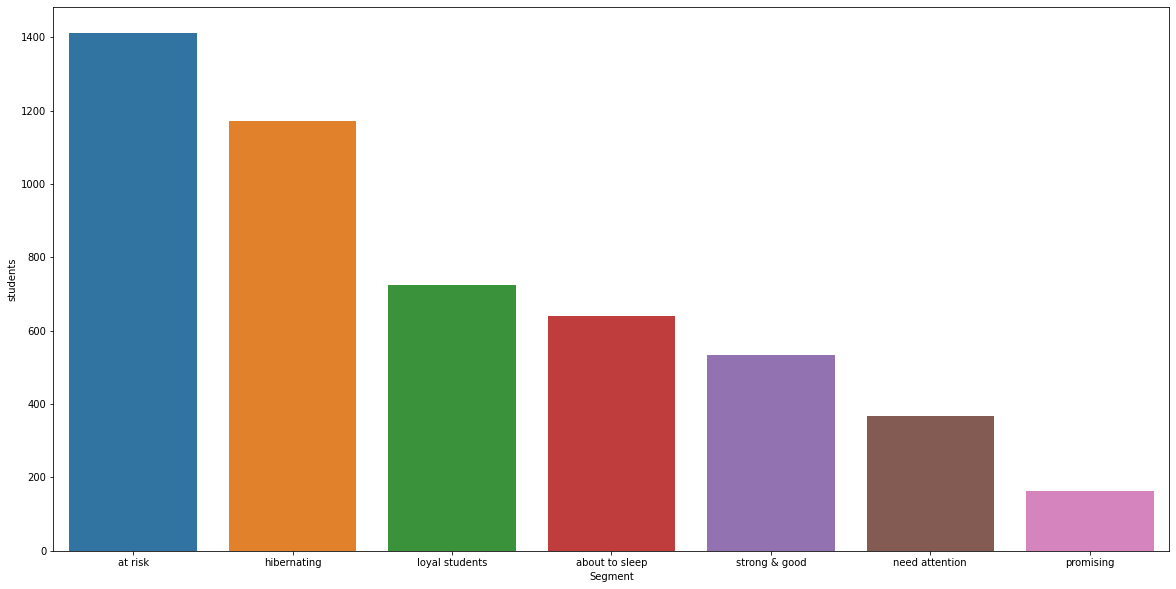

In [138]:
plt.figure(figsize=(20, 10))
sns.barplot(x=visualisation.Segment, y=visualisation.students)